In [1]:
import nibabel as nb
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
os.chdir() # Change this to your file path

In [3]:
img = nb.load('eres.mgh')

df = pd.read_csv('behavioural_results.csv')

data = img.get_fdata()

voxel_data = data[10000].flatten()

voxel_data = np.array(voxel_data,dtype=float) 

voxel_df = pd.DataFrame(voxel_data)

model = pd.concat([df[['G-Number','age_adjusted_group','Age']],voxel_df],axis=1).rename(columns={0:'voxel'})

groups = pd.get_dummies(model['age_adjusted_group'])

model = pd.concat([model,groups],axis=1)

X_age = model[['voxel','AAN','HC','WR','Age']]  

X_minage = model[['voxel','AAN','HC','WR']] 

<AxesSubplot:>

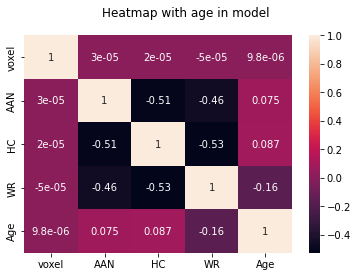

In [4]:
plt.suptitle('Heatmap with age in model')
sns.heatmap(X_age.corr(), annot=True)

<AxesSubplot:>

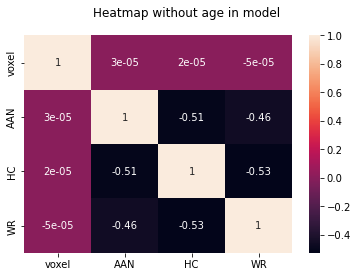

In [5]:
plt.suptitle('Heatmap without age in model')
sns.heatmap(X_minage.corr(), annot=True)